In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

from sklearn.svm import SVC
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE


In [4]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Performing EDA
Basic info

In [5]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Class Imbalance Check

Class
0    284315
1       492
Name: count, dtype: int64


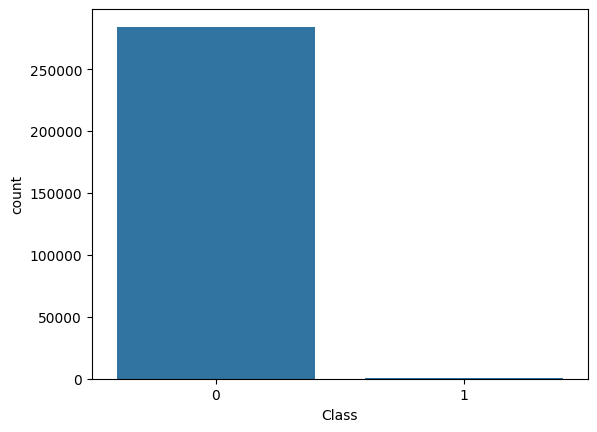

In [6]:
sns.countplot(x='Class', data=df)
print(df['Class'].value_counts())


Distribution of amount and time

<Axes: xlabel='Amount', ylabel='Count'>

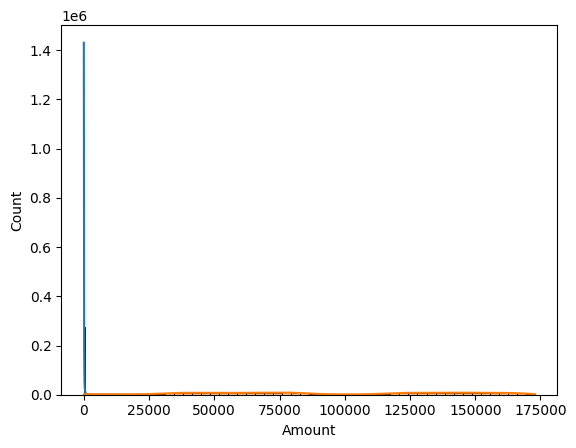

In [7]:
sns.histplot(df['Amount'], bins=50, kde=True)
sns.histplot(df['Time'], bins=50, kde=True)


Correlation Heatmap

<Axes: >

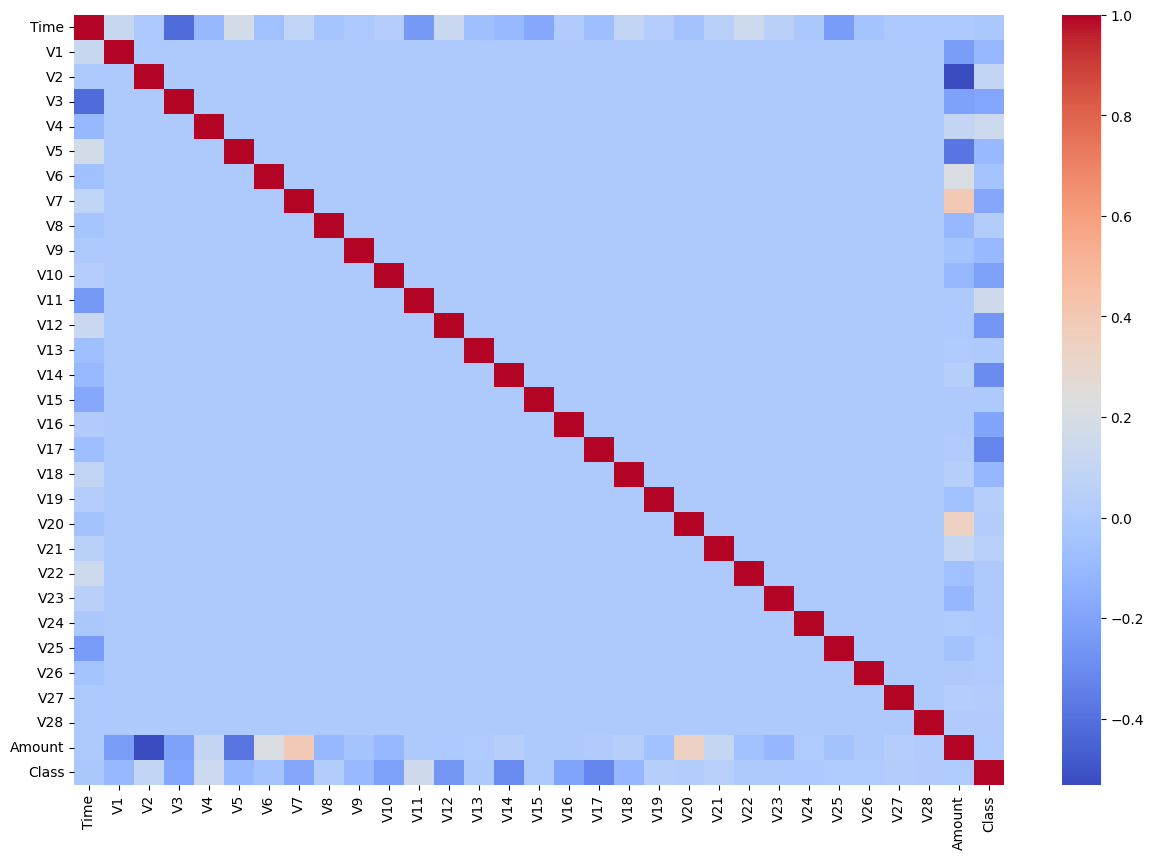

In [8]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)


Preprocessing
Standardinzing amount and time

In [9]:
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))
df.drop(['Amount', 'Time'], axis=1, inplace=True)


In [10]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [11]:
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print(y_train.value_counts(), y_train_sm.value_counts())


Class
0    227451
1       394
Name: count, dtype: int64 Class
0    227451
1    227451
Name: count, dtype: int64


Training Using SVM
(Don't recommend running this cell. Because the dataset is too big and svm is ver slow combined with smote which doubles the samples, it can take hours fo the below cell to run)

In [ ]:
svm = SVC(kernel='rbf', probability=True)  # RBF kernel works better
svm.fit(X_train_sm, y_train_sm)

y_pred_svm = svm.predict(X_test)
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM ROC AUC Score:", roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1]))

Training Using XGBoost

In [12]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_sm, y_train_sm)

y_pred_xgb = xgb.predict(X_test)
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("XGBoost ROC AUC Score:", roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1]))

C:\Users\a\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [07:25:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.89      0.80        98

    accuracy                           1.00     56962
   macro avg       0.87      0.94      0.90     56962
weighted avg       1.00      1.00      1.00     56962

XGBoost ROC AUC Score: 0.9791588308086319


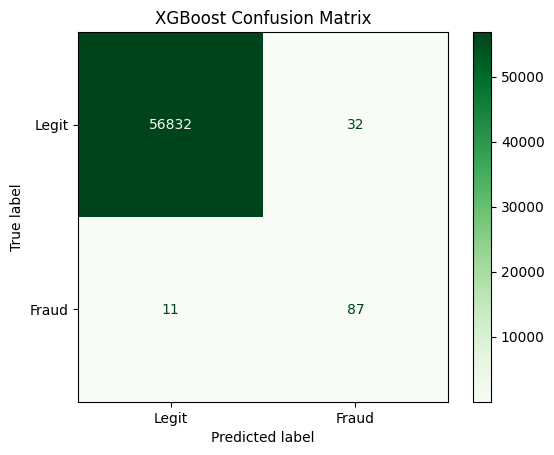

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# For SVM
# cm_svm = confusion_matrix(y_test, y_pred_svm)
# disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=['Legit', 'Fraud'])
# disp_svm.plot(cmap='Blues')
# plt.title("SVM Confusion Matrix")
# plt.show()

# For XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=['Legit', 'Fraud'])
disp_xgb.plot(cmap='Greens')
plt.title("XGBoost Confusion Matrix")
plt.show()


In [17]:
import joblib

# Save SVM
# joblib.dump(svm, "svm_model.joblib")

# Save XGBoost
joblib.dump(xgb, "xgb_model.joblib")


['xgb_model.joblib']